___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
knn_data=pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
knn_data.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

In [12]:
#sns.set_theme()
sns.set_style('darkgrid')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

<AxesSubplot:xlabel='XVPM', ylabel='Count'>

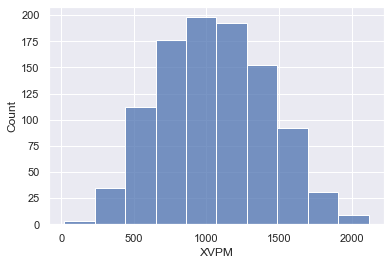

In [24]:
sns.histplot(knn_data['XVPM'],bins=10)

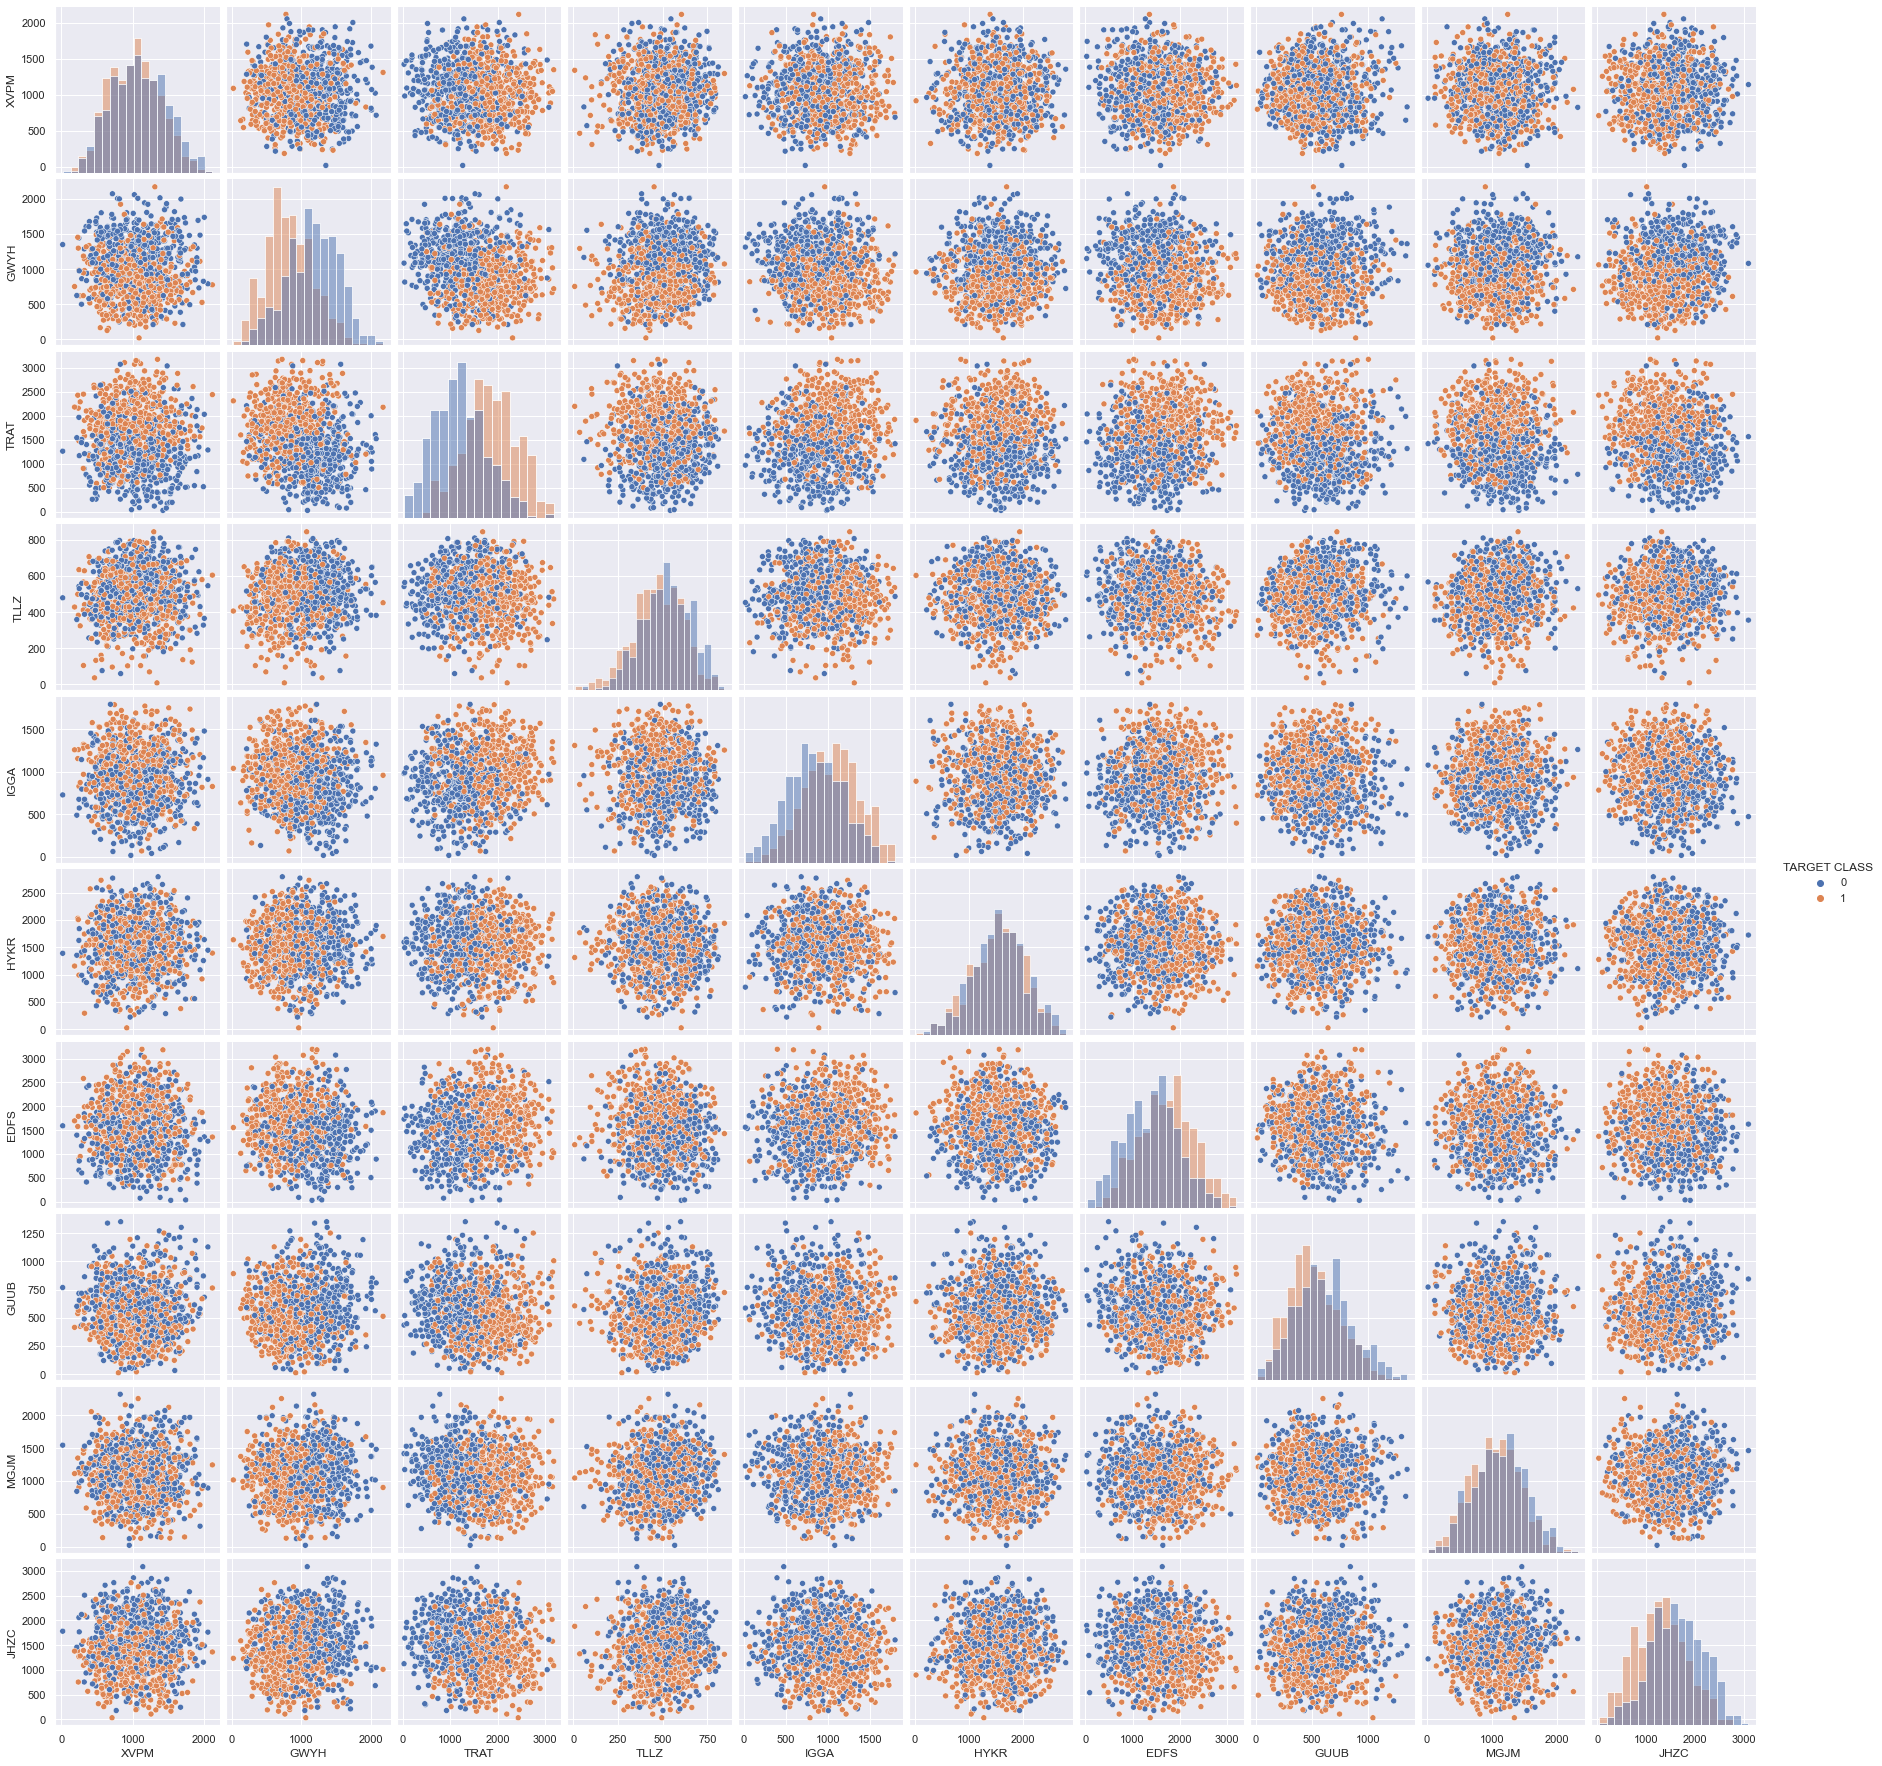

In [25]:
sns.pairplot(knn_data,diag_kind='hist',hue='TARGET CLASS')

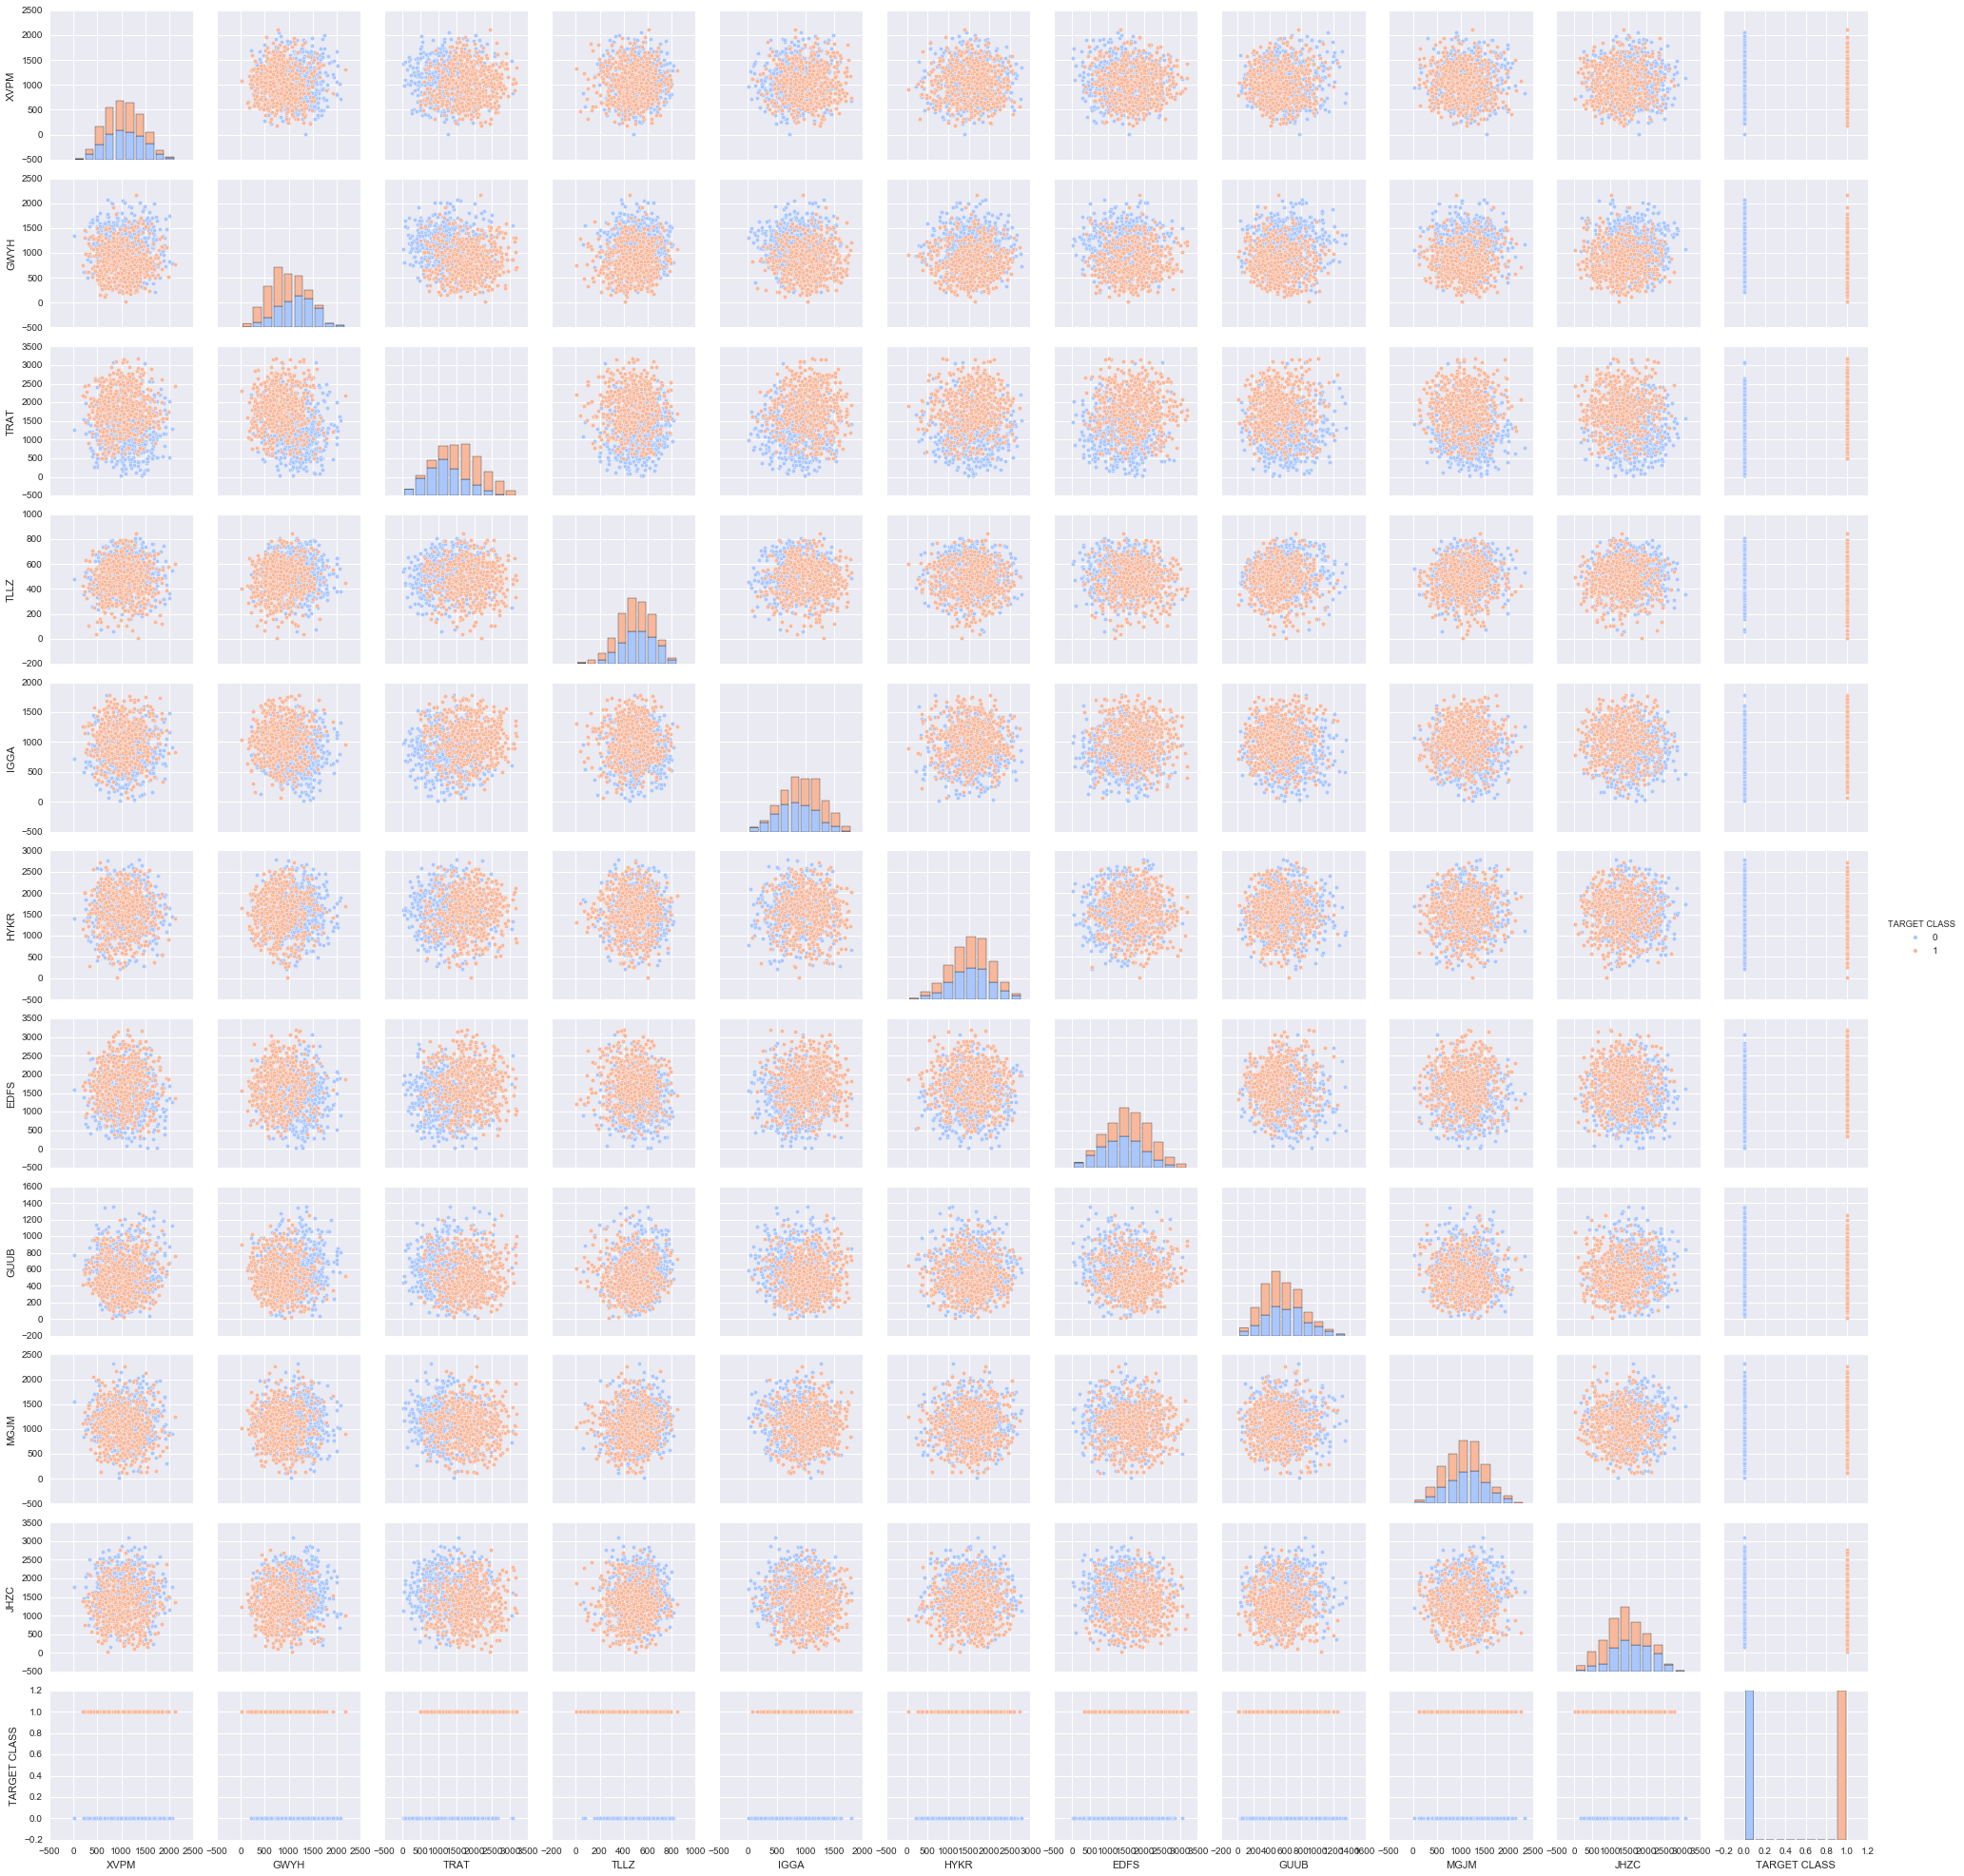

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [26]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [27]:
scaler=StandardScaler()

** Fit scaler to the features.**

In [28]:
scaler.fit(knn_data.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [29]:
scaled_features=scaler.transform(knn_data.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [30]:
knn=pd.DataFrame(scaled_features,columns=knn_data.columns[:-1])
knn.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [31]:
from sklearn.model_selection import train_test_split
x=knn
y=knn_data['TARGET CLASS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [32]:
x_train

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
290 -2.174752 -0.018554 -0.079399  0.982093 -0.321720 -1.130540 -1.106023   
167  0.569587 -1.689740  0.257413  0.430801  1.234619 -0.092057  0.926614   
486  0.509422 -1.169816  0.272174 -0.748102 -0.376545 -1.310755  1.196297   
683  0.489994  0.386086  0.189835  0.382034 -1.976215  1.200304  1.800290   
876 -0.020449 -0.412586  1.444908  0.330387  0.656949  0.299770  0.507379   
..        ...       ...       ...       ...       ...       ...       ...   
575  1.286740  0.062053 -0.705295 -2.079875 -1.449433 -0.799082  1.873326   
838  1.056628  2.176742  1.173371  0.141676 -0.375129  0.106478 -0.842854   
337  0.935842  0.552590 -1.372636  0.378254  0.916928  0.365400 -1.347375   
523 -1.073616  0.300187 -1.536335  0.585133 -0.529769 -1.570165 -0.692331   
863  0.589397 -0.988244  0.142134 -0.362477  1.799580 -1.946273  1.264719   

         GUUB      MGJM      JHZC  
290  0.194763 -0.452992 -0.322474  
167 -0.222843  0.294700  1.333316  
486 -1.539157 -0.498940 -0.657784  
683  0.651946  1.203692 -0.173654  
876 -0.568271 -0.061135 -2.217078  
..        ...       ...       ...  
575  0.686651  0.346299 -1.130251  
838  1.996686 -1.531655  0.001460  
337 -0.853849  0.899254  1.316637  
523 -0.914993  0.394708 -0.117782  
863  0.770453 -0.458790 -0.889258  

[700 rows x 10 columns]

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [33]:
from sklearn.neighbors import KNeighborsClassifier


**Create a KNN model instance with n_neighbors=1**

In [34]:
kmodel=KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [35]:
kmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [42]:
pred=kmodel.predict(x_test)

** Create a confusion matrix and classification report.**

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



[[112  40]
 [ 34 114]]


             precision    recall  f1-score   support

          0       0.77      0.74      0.75       152
          1       0.74      0.77      0.75       148

avg / total       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [44]:
error_rate= []

for i in range(1,40):
    
    k_model=KNeighborsClassifier(n_neighbors=i)
    k_model.fit(x_train,y_train)
    predicted=k_model.predict(x_test)
    error_rate.append(np.mean(predicted!=y_test))
    

**Now create the following plot using the information from your for loop.**

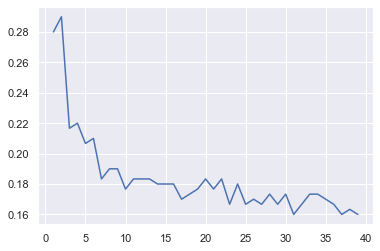

In [45]:
plt.plot(range(1,40),error_rate)

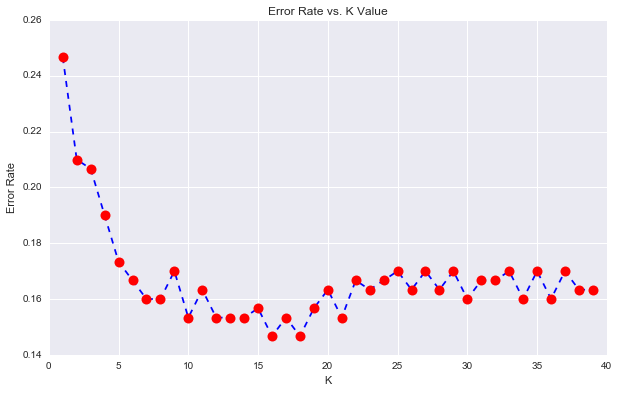

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [71]:
#k=25
k_model=KNeighborsClassifier(n_neighbors=30)
k_model.fit(x_train,y_train)
predicted=k_model.predict(x_test)


In [72]:
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[124  28]
 [ 24 124]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



WITH K=30


[[127  25]
 [ 23 125]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.84       152
          1       0.83      0.84      0.84       148

avg / total       0.84      0.84      0.84       300



# Great Job!